# Disaster Dataset

In [98]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

### Environment set-up

In [47]:
df = pd.read_excel("/Users/jafar/Downloads/cis 490/public_emdat_project.xlsx")

In [48]:
df.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1999-9388-DJI,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,DJI,...,NaN,NaN,NaN,NaN,NaN,NaN,58.111,"[{""adm1_code"":1093,""adm1_name"":""Ali Sabieh""},{...",2006-03-01,2023-09-25
1,1999-9388-SDN,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SDN,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514,"[{""adm1_code"":2757,""adm1_name"":""Northern Darfu...",2006-03-08,2023-09-25
2,1999-9388-SOM,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SOM,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514,"[{""adm1_code"":2691,""adm1_name"":""Bay""},{""adm1_c...",2006-03-08,2023-09-25
3,2000-0001-AGO,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514,NaN,2004-10-27,2023-09-25
4,2000-0002-AGO,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,10000.000,17695.000,56.514,"[{""adm2_code"":4214,""adm2_name"":""Baia Farta""},{...",2005-02-03,2023-09-25


### Perform EDA on the Disasters dataset 

In [49]:
# Display information of the dataset using df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15784 entries, 0 to 15783
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   DisNo.                                     15784 non-null  object        
 1   Historic                                   15784 non-null  object        
 2   Classification Key                         15784 non-null  object        
 3   Disaster Group                             15784 non-null  object        
 4   Disaster Subgroup                          15784 non-null  object        
 5   Disaster Type                              15784 non-null  object        
 6   Disaster Subtype                           15784 non-null  object        
 7   External IDs                               2405 non-null   object        
 8   Event Name                                 4955 non-null   object        
 9   ISO              

##### Count how many null values are present in each column and display those counts

In [50]:
print(df.isnull().sum())

DisNo.                                           0
Historic                                         0
Classification Key                               0
Disaster Group                                   0
Disaster Subgroup                                0
Disaster Type                                    0
Disaster Subtype                                 0
External IDs                                 13379
Event Name                                   10829
ISO                                              0
Country                                          0
Subregion                                        0
Region                                           0
Location                                       648
Origin                                       11829
Associated Types                             12488
OFDA/BHA Response                                0
Appeal                                           0
Declaration                                      0
AID Contribution ('000 US$)    

##### Print the summary statistics for the entire data frame

In [51]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # Remove scientific notation
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AID Contribution ('000 US$),490.000,28510.700,211681.558,3.000,166.000,766.500,4951.000,3518530.000
Magnitude,3378.000,60061.246,741225.204,-57.000,7.600,190.000,20497.500,40000000.000
Latitude,1815.000,16.464,21.776,-72.640,1.103,18.590,34.817,67.930
Longitude,1815.000,42.140,75.535,-172.095,0.859,54.448,103.099,179.650
Start Year,15784.000,2010.590,7.131,2000.000,2004.000,2010.000,2017.000,2024.000
Start Month,15715.000,6.449,3.421,1.000,4.000,7.000,9.000,12.000
Start Day,14275.000,15.361,8.973,1.000,7.000,15.000,23.000,31.000
End Year,15784.000,2010.622,7.135,2000.000,2004.000,2010.000,2017.000,2024.000
End Month,15622.000,6.573,3.398,1.000,4.000,7.000,9.000,12.000
End Day,14342.000,15.800,8.894,1.000,8.000,16.000,24.000,31.000


##### Fill in missing values using the median. Show how many null values are present after handling missing values

In [52]:
df.fillna(df.median(numeric_only = True), inplace  = True)
print(df.isnull().sum())

DisNo.                                           0
Historic                                         0
Classification Key                               0
Disaster Group                                   0
Disaster Subgroup                                0
Disaster Type                                    0
Disaster Subtype                                 0
External IDs                                 13379
Event Name                                   10829
ISO                                              0
Country                                          0
Subregion                                        0
Region                                           0
Location                                       648
Origin                                       11829
Associated Types                             12488
OFDA/BHA Response                                0
Appeal                                           0
Declaration                                      0
AID Contribution ('000 US$)    

### Visualizations using PLOTLY library

##### Create a visual that shows disaster counts per year

In [53]:
df["Start Year"] = pd.to_datetime(df["Start Year"], format = "%Y")
disaster_per_year = df.groupby("Start Year").agg(Disaster_Count = pd.NamedAgg("Start Year", "count")).sort_values("Disaster_Count", ascending = False).reset_index(drop = False)
disaster_per_year["Start Year"] = disaster_per_year["Start Year"].dt.year
disaster_per_year

,Start Year,Disaster_Count
0,2000,894
1,2002,865
2,2005,854
3,2001,771
4,2006,760
5,2004,755
6,2003,754
7,2007,724
8,2010,670
9,2008,654


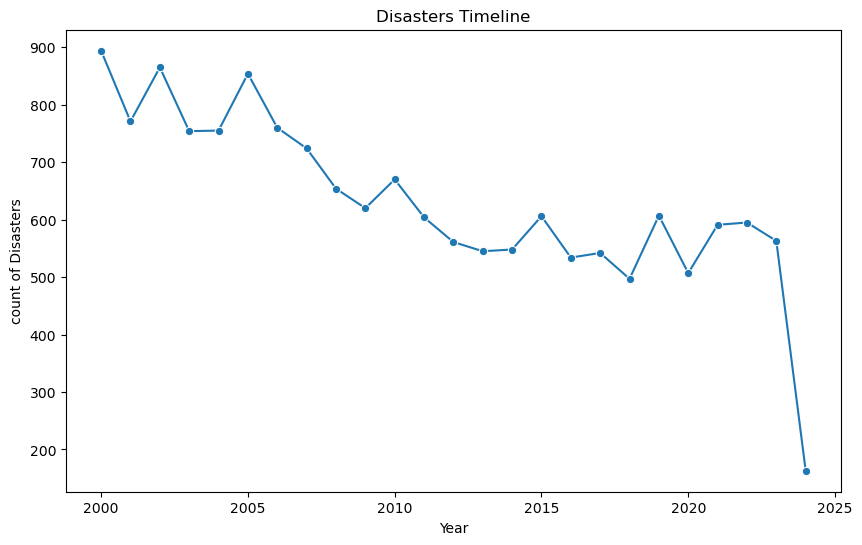

In [54]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = disaster_per_year, x = "Start Year", y = "Disaster_Count", marker = "o")
plt.title("Disasters Timeline")
plt.xlabel("Year")
plt.ylabel("count of Disasters")
plt.xticks(rotation = 0)
plt.show()

##### Create a visual that shows the top 10 disasters by total fatalities

In [55]:
disasters = df[['Disaster Type', 'Total Deaths']].groupby('Disaster Type').sum().sort_values(by='Total Deaths', ascending=False).reset_index()
top_10_disasters = disasters.head(10)
top_10_disasters 

,Disaster Type,Total Deaths
0,Earthquake,792032.000
1,Extreme temperature,238555.000
2,Storm,230495.000
3,Flood,149966.000
4,Epidemic,120325.000
5,Water,50416.000
6,Road,45990.000
7,Drought,30272.000
8,Mass movement (wet),20380.000
9,Air,16844.000


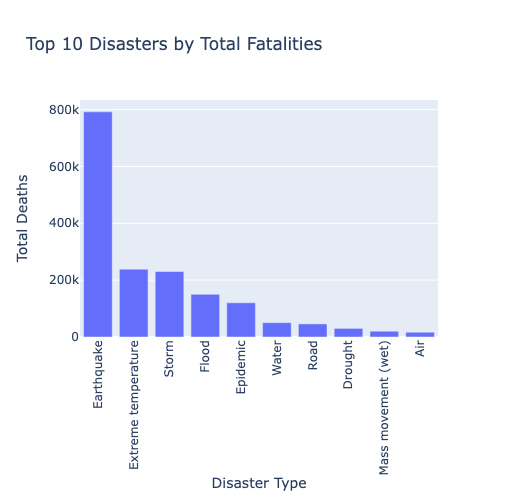

In [80]:
fig = px.bar(top_10_disasters, 
             x='Disaster Type', 
             y='Total Deaths', 
             title='Top 10 Disasters by Total Fatalities',
             labels={'Disaster Type': 'Disaster Type', 'Total Deaths': 'Total Deaths'})

fig.update_layout(xaxis_title="Disaster Type", 
                  yaxis_title="Total Deaths",
                  xaxis_tickangle=-90,
                  width=500, 
                  height=500)

##### Create a correlation matrix heatmap

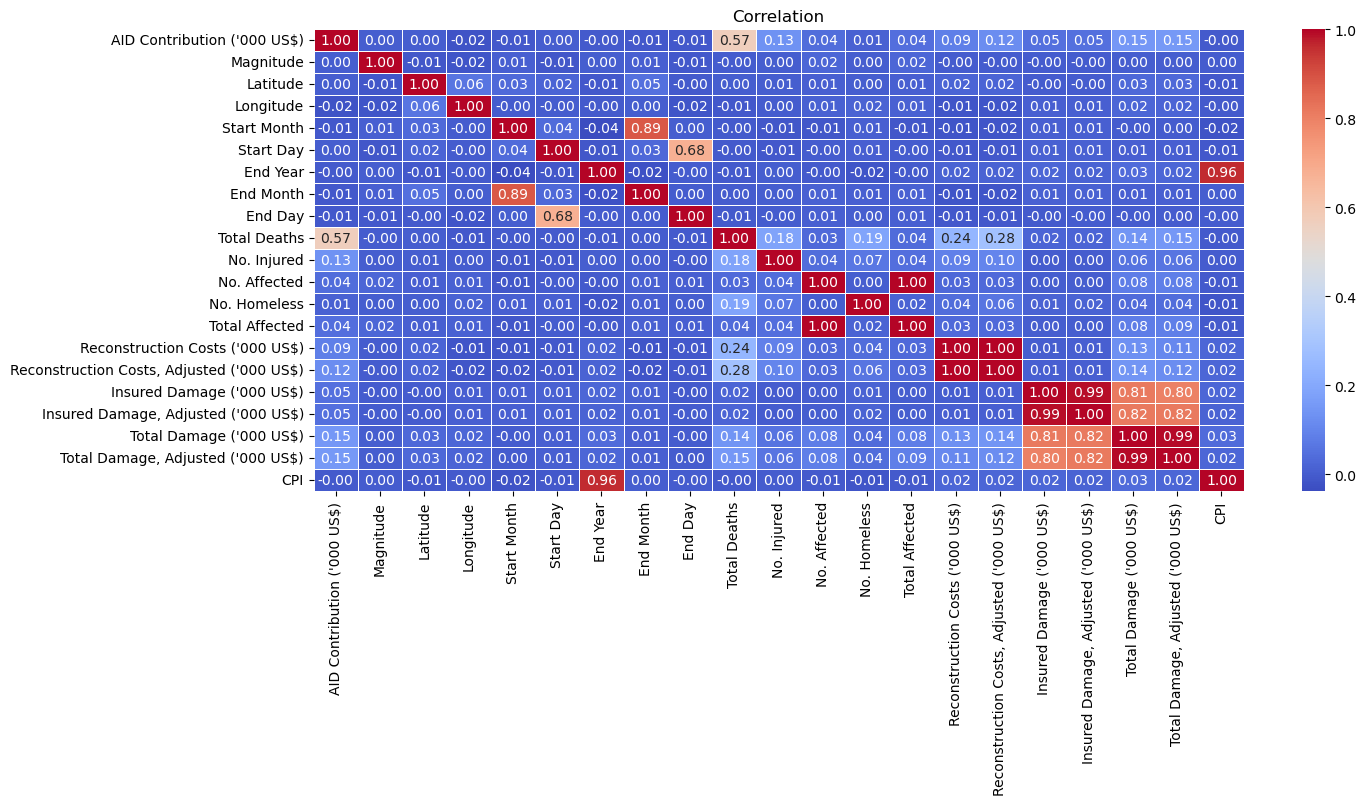

In [77]:
numerical_df = df.select_dtypes(include = ["number"])
numerical_cor = numerical_df.corr()

plt.figure(figsize = (15, 6))
sns.heatmap(data = numerical_cor, annot = True, cmap = "coolwarm", fmt = ".2f", linewidth = 0.5)
plt.title("Correlation")
plt.show()

1. The correlation between Total Deaths and Total Damage is quite low, suggesting that disasters with high economic impacts do not necessarily cause a large number of fatalities.
2. There is a strong positive correlation between Total Damage and Total Damage, Adjusted, indicating that higher raw damages generally align with higher adjusted damages.
3. There's a moderate positive correlation between Total Deaths and Total Affected, which suggests that disasters that result in more deaths also tend to affect a larger number of people.

##### Create a treemap using hierarchical columns you would like to explore

In [69]:
year_filter = df[df["End Year"] == 2000]
year_filter.shape

(878, 46)

In [92]:
year_filter_grouped = year_filter.groupby(["Disaster Subgroup", "Region", "Total Deaths"]).agg(Group_Count = pd.NamedAgg("Disaster Group", "size")).sort_values("Group_Count", ascending = False).reset_index(drop = False)
year_filter_grouped

,Disaster Subgroup,Region,Total Deaths,Group_Count
0,Hydrological,Europe,16.000,22
1,Hydrological,Africa,16.000,16
2,Meteorological,Asia,16.000,14
3,Climatological,Americas,16.000,12
4,Geophysical,Asia,16.000,11
...,...,...,...,...
462,Meteorological,Africa,130.000,1
463,Meteorological,Africa,23.000,1
464,Meteorological,Africa,17.000,1
465,Hydrological,Africa,2.000,1


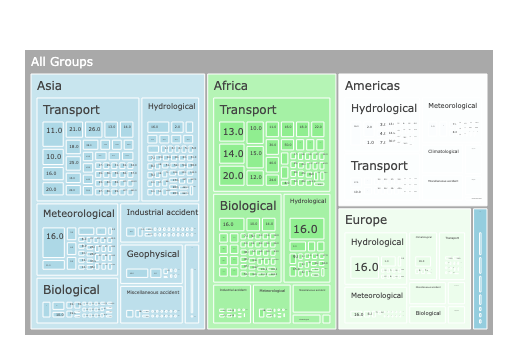

In [94]:
treemap = px.treemap(year_filter_grouped, 
                     path = [px.Constant("All Groups"), "Region", "Disaster Subgroup", "Total Deaths"],
                     values = "Group_Count")

treemap.update_traces(root_color = "darkgrey")
treemap.update_layout(
    treemapcolorway = ["lightblue", "lightgreen"],
    margin = dict(t = 50, l = 25, r = 25, b = 25),
    font_color = "white")
treemap.show()

Comment: Hierarchy shows that Asia suffers most death, where most deaths are caused by transport. This is applicable for all groups in order

##### Create a stacked area chart of columns of your choosing

In [131]:
country_grouped = df.groupby(["Disaster Subgroup", "Start Year"]).agg(Count_Disaster = pd.NamedAgg("Country", "size")).sort_values("Start Year", ascending = False).reset_index(drop = False)
country_grouped

,Disaster Subgroup,Start Year,Count_Disaster
0,Transport,2024-01-01,23
1,Meteorological,2024-01-01,37
2,Climatological,2024-01-01,12
3,Geophysical,2024-01-01,8
4,Industrial accident,2024-01-01,3
...,...,...,...
195,Meteorological,2000-01-01,132
196,Hydrological,2000-01-01,184
197,Geophysical,2000-01-01,36
198,Climatological,2000-01-01,57


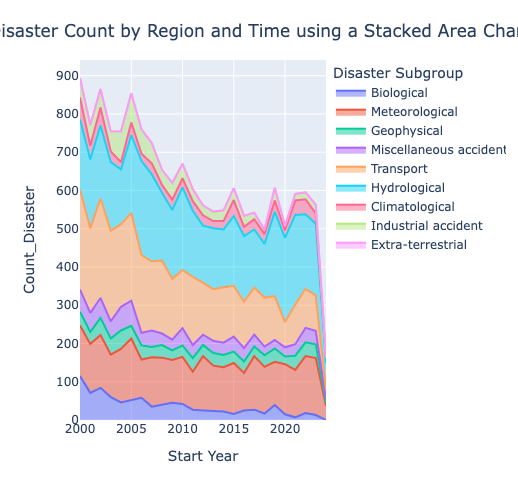

In [130]:
# Create stacked area chart
area_chart = px.area(country_grouped, color = "Disaster Subgroup", x = "Start Year", y = "Count_Disaster", line_group = "Disaster Subgroup", width = 500, height = 500)
area_chart.update_layout(title = {"text": "Disaster Count by Region and Time using a Stacked Area Chart", "y": 0.95, "x": 0.5, "xanchor": "center", "yanchor": "top"})
area_chart.show()

1. Decline in disascount overtime.
2. Hydrological and Meteorological events, consistently represent the largest share of disasters over time

## Data encoding 

##### Encode 3 different categorical columns in this dataset using scikit-learn techniques, OneHotEncoding and OrdinalEncoding

In [103]:
# OrdinalEncoding 
ord_encoder = OrdinalEncoder()
df[["Region Code", "Disaster Subgroup Code", "Disaster Type Code"]] = ord_encoder.fit_transform(df[["Region","Disaster Subgroup", "Disaster Type"]])
df[["Region", "Region Code", "Disaster Subgroup", "Disaster Subgroup Code", "Disaster Type", "Disaster Type Code"]].head(10)

,Region,Region Code,Disaster Subgroup,Disaster Subgroup Code,Disaster Type,Disaster Type Code
0,Africa,0.000,Climatological,1.000,Drought,5.000
1,Africa,0.000,Climatological,1.000,Drought,5.000
2,Africa,0.000,Climatological,1.000,Drought,5.000
3,Africa,0.000,Transport,8.000,Road,26.000
4,Africa,0.000,Hydrological,4.000,Flood,13.000
5,Asia,2.000,Meteorological,6.000,Extreme temperature,10.000
6,Americas,1.000,Transport,8.000,Road,26.000
7,Asia,2.000,Transport,8.000,Road,26.000
8,Asia,2.000,Miscellaneous accident,7.000,Fire (Miscellaneous),12.000
9,Africa,0.000,Transport,8.000,Road,26.000


In [109]:
# OneHotEncoding 
onehot_encode_copy = df.copy()
onehot_encoder = OneHotEncoder()
onehot_results = onehot_encoder.fit_transform(onehot_encode_copy[["Region", "Disaster Subgroup", "Disaster Type"]])

onehot_df = pd.DataFrame(onehot_results.toarray(), columns=onehot_encoder.get_feature_names_out())

In [111]:
onehot_df

,Region_Africa,Region_Americas,Region_Asia,Region_Europe,Region_Oceania,Disaster Subgroup_Biological,Disaster Subgroup_Climatological,Disaster Subgroup_Extra-terrestrial,Disaster Subgroup_Geophysical,Disaster Subgroup_Hydrological,...,Disaster Type_Miscellaneous accident (General),Disaster Type_Oil spill,Disaster Type_Poisoning,Disaster Type_Radiation,Disaster Type_Rail,Disaster Type_Road,Disaster Type_Storm,Disaster Type_Volcanic activity,Disaster Type_Water,Disaster Type_Wildfire
0,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
4,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15779,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
15780,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
15781,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
15782,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
